# Solución: Métodos de Selección de Características

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import (
    VarianceThreshold, SelectKBest, f_regression, mutual_info_regression,
    SelectPercentile, RFE, RFECV, SelectFromModel
)

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Configuración para visualizaciones
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")

# Ignorar advertencias
import warnings
warnings.filterwarnings('ignore')

## 1. Cargar y Explorar los Datos

In [2]:
autos_df = pd.read_csv("../data/fe/autos.csv")

autos_df.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [3]:
# Información del dataset
autos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    int64  
 1   make               193 non-null    object 
 2   fuel_type          193 non-null    object 
 3   aspiration         193 non-null    object 
 4   num_of_doors       193 non-null    int64  
 5   body_style         193 non-null    object 
 6   drive_wheels       193 non-null    object 
 7   engine_location    193 non-null    object 
 8   wheel_base         193 non-null    float64
 9   length             193 non-null    float64
 10  width              193 non-null    float64
 11  height             193 non-null    float64
 12  curb_weight        193 non-null    int64  
 13  engine_type        193 non-null    object 
 14  num_of_cylinders   193 non-null    int64  
 15  engine_size        193 non-null    int64  
 16  fuel_system        193 non

In [4]:
# Estadísticas descriptivas
autos_df.describe()

,symboling,num_of_doors,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,0.797927,3.160622,98.923834,174.326425,65.893782,53.869948,2561.507772,4.419689,128.124352,3.330622,3.248860,9.860104,103.481865,5099.740933,25.326425,30.787565,13285.025907
std,1.235582,0.989583,6.152409,12.478593,2.137795,2.394770,526.700026,1.023182,41.590452,0.272385,0.315421,4.002098,37.960107,468.694369,6.387828,6.816910,8089.082886
min,-2.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,3.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,98.000000,3.150000,3.110000,8.000000,70.000000,4800.000000,19.000000,25.000000,7738.000000
50%,1.000000,4.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,2.000000,4.000000,102.400000,184.600000,66.900000,55.700000,2952.000000,4.000000,146.000000,3.590000,3.410000,9.000000,116.000000,5500.000000,30.000000,34.000000,16515.000000
max,3.000000,4.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
# Verificar valores nulos
autos_df.isnull().sum()

symboling            0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

## 2. Preparación de Datos

In [6]:
# Identificar variables numéricas y categóricas
num_cols = autos_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = autos_df.select_dtypes(include=['object']).columns.tolist()

print(f"Variables numéricas: {len(num_cols)}")
print(f"Variables categóricas: {len(cat_cols)}")

Variables numéricas: 17
Variables categóricas: 8


In [7]:
# Convertir variables categóricas a numéricas usando One-Hot Encoding
autos_encoded = pd.get_dummies(autos_df, columns=cat_cols, drop_first=True)
autos_encoded.shape

(193, 56)

In [8]:
# Definir las variables predictoras (X) y objetivo (y)
X = autos_encoded.drop('price', axis=1)
y = autos_encoded['price']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Forma del conjunto de entrenamiento: {X_train.shape}")
print(f"Forma del conjunto de prueba: {X_test.shape}")

Forma del conjunto de entrenamiento: (135, 55)
Forma del conjunto de prueba: (58, 55)


In [9]:
# Escalar características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir de nuevo a DataFrame para mantener los nombres de columnas
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

## 3. Métodos de Filtrado

### 3.1 Eliminar Características Constantes y Cuasi-constantes

In [10]:
# Eliminar características constantes
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train_scaled)

# Identificar características constantes
constant_features = [feature for feature, bool_val in zip(X_train.columns, constant_filter.get_support()) if not bool_val]
print(f"Características constantes: {constant_features}")
print(f"Número de características constantes: {len(constant_features)}")

Características constantes: ['make_mercury', 'fuel_system_spfi']
Número de características constantes: 2


In [11]:
# Eliminar características cuasi-constantes (varianza < 0.01)
quasi_constant_filter = VarianceThreshold(threshold=0.01)
quasi_constant_filter.fit(X_train_scaled)

# Identificar características cuasi-constantes
quasi_constant_features = [feature for feature, bool_val in zip(X_train.columns, quasi_constant_filter.get_support()) if not bool_val]
print(f"Características cuasi-constantes: {quasi_constant_features}")
print(f"Número de características cuasi-constantes: {len(quasi_constant_features)}")

Características cuasi-constantes: ['make_mercury', 'fuel_system_spfi']
Número de características cuasi-constantes: 2


In [12]:
# Eliminar características constantes y cuasi-constantes
X_train_no_const = X_train_scaled.drop(columns=quasi_constant_features)
X_test_no_const = X_test_scaled.drop(columns=quasi_constant_features)

print(f"Número original de características: {X_train_scaled.shape[1]}")
print(f"Número de características después de eliminar constantes y cuasi-constantes: {X_train_no_const.shape[1]}")

Número original de características: 55
Número de características después de eliminar constantes y cuasi-constantes: 53


### 3.2 Selección Univariada con SelectKBest y SelectPercentile

In [13]:
# SelectKBest con f_regression
k_best_f = SelectKBest(f_regression, k=10)
X_train_kbest_f = k_best_f.fit_transform(X_train_no_const, y_train)

# Obtener las características seleccionadas
selected_features_kbest_f = X_train_no_const.columns[k_best_f.get_support()]
print("Top 10 características seleccionadas con f_regression:")
print(selected_features_kbest_f.tolist())

Top 10 características seleccionadas con f_regression:
['length', 'width', 'curb_weight', 'num_of_cylinders', 'engine_size', 'horsepower', 'city_mpg', 'highway_mpg', 'drive_wheels_fwd', 'drive_wheels_rwd']


In [14]:
# SelectKBest con mutual_info_regression
k_best_mi = SelectKBest(mutual_info_regression, k=10)
X_train_kbest_mi = k_best_mi.fit_transform(X_train_no_const, y_train)

# Obtener las características seleccionadas
selected_features_kbest_mi = X_train_no_const.columns[k_best_mi.get_support()]
print("Top 10 características seleccionadas con mutual_info_regression:")
print(selected_features_kbest_mi.tolist())

Top 10 características seleccionadas con mutual_info_regression:
['wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'horsepower', 'city_mpg', 'highway_mpg']


In [15]:
# SelectPercentile con f_regression (20% superior)
percentile_selector = SelectPercentile(f_regression, percentile=20)
X_train_percentile = percentile_selector.fit_transform(X_train_no_const, y_train)

# Obtener las características seleccionadas
selected_features_percentile = X_train_no_const.columns[percentile_selector.get_support()]
print(f"Características seleccionadas en el percentil 20 superior:")
print(selected_features_percentile.tolist())
print(f"Número de características seleccionadas: {len(selected_features_percentile)}")

Características seleccionadas en el percentil 20 superior:
['wheel_base', 'length', 'width', 'curb_weight', 'num_of_cylinders', 'engine_size', 'horsepower', 'city_mpg', 'highway_mpg', 'drive_wheels_fwd', 'drive_wheels_rwd']
Número de características seleccionadas: 11


### 3.3 Análisis de Correlación con Mapa de Calor

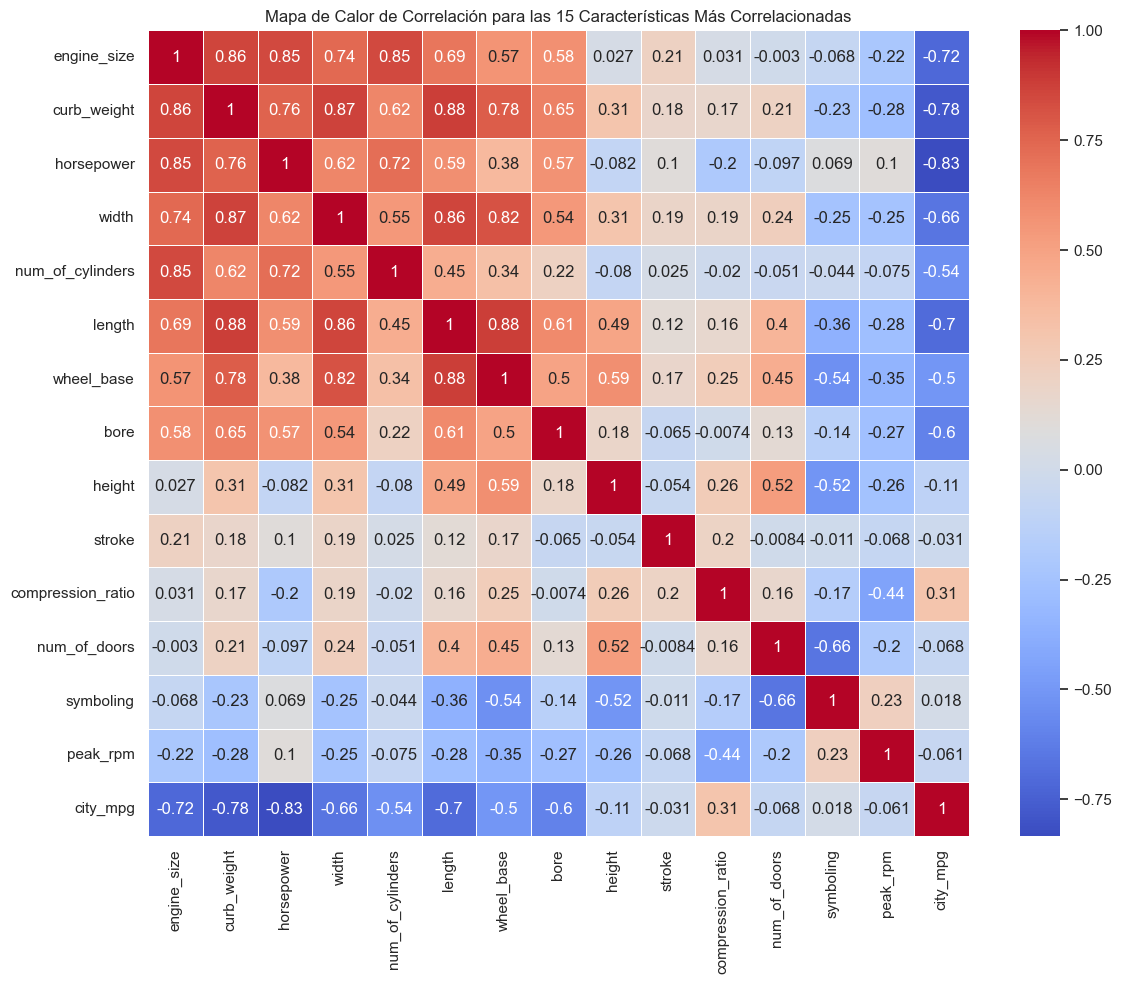

15 características más correlacionadas con el precio:
engine_size: 0.8888
curb_weight: 0.8354
horsepower: 0.8125
width: 0.7546
num_of_cylinders: 0.7460
length: 0.6959
wheel_base: 0.5850
bore: 0.5463
height: 0.1362
stroke: 0.0960
compression_ratio: 0.0781
num_of_doors: 0.0465
symboling: -0.0848
peak_rpm: -0.1038
city_mpg: -0.7066


In [16]:
# Calcular la matriz de correlación
corr_matrix = autos_df.corr(numeric_only=True)

# Visualizar el mapa de calor (solo para las top 15 características más correlacionadas con el precio)
plt.figure(figsize=(12, 10))
correlation_with_price = corr_matrix['price'].sort_values(ascending=False)[1:16]  # Excluir price mismo
top_corr_features = correlation_with_price.index.tolist()

# Crear un subset de la matriz de correlación con las características más correlacionadas
top_corr_matrix = corr_matrix.loc[top_corr_features, top_corr_features]

# Crear el mapa de calor
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlación para las 15 Características Más Correlacionadas')
plt.tight_layout()
plt.show()

# Mostrar las 15 características más correlacionadas con el precio
print("15 características más correlacionadas con el precio:")
for feature, corr in correlation_with_price.items():
    print(f"{feature}: {corr:.4f}")

In [17]:
# Identificar pares de características altamente correlacionadas entre sí
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Mostrar pares de características altamente correlacionadas
print(f"Número de pares de características altamente correlacionadas: {len(high_corr_pairs)}")
for feature1, feature2, corr in high_corr_pairs:
    print(f"{feature1} - {feature2}: {corr:.4f}")

Número de pares de características altamente correlacionadas: 1
city_mpg - highway_mpg: 0.9720


In [18]:
# Eliminar características altamente correlacionadas (manteniendo la más correlacionada con el precio)
def remove_correlated_features(X, threshold=0.9):
    corr_matrix = X.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    # Identificar características para eliminar
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    
    # Para cada par de características correlacionadas, mantener la más correlacionada con el precio
    price_corr = X.corrwith(y).abs()
    features_to_keep = []
    
    for i in range(len(upper.columns)):
        for j in range(i+1, len(upper.columns)):
            col_i = upper.columns[i]
            col_j = upper.columns[j]
            if upper.iloc[i, j] > threshold:
                if price_corr[col_i] > price_corr[col_j]:
                    if col_j in to_drop and col_j not in features_to_keep:
                        features_to_keep.append(col_i)
                else:
                    if col_i in to_drop and col_i not in features_to_keep:
                        features_to_keep.append(col_j)
    
    # Eliminar características, pero mantener las que están en features_to_keep
    final_to_drop = [col for col in to_drop if col not in features_to_keep]
    
    return X.drop(columns=final_to_drop), final_to_drop

X_train_no_corr, dropped_features = remove_correlated_features(X_train_no_const)

print(f"Número de características eliminadas por alta correlación: {len(dropped_features)}")
print(f"Características eliminadas: {dropped_features}")
print(f"Número de características restantes: {X_train_no_corr.shape[1]}")

Número de características eliminadas por alta correlación: 4
Características eliminadas: ['highway_mpg', 'fuel_type_gas', 'drive_wheels_rwd', 'engine_type_l']
Número de características restantes: 49


## 4. Métodos Wrapper

### 4.1 Eliminación Recursiva de Características (RFE)

In [19]:
# Aplicar RFE con regresión lineal
lm = LinearRegression()
rfe = RFE(estimator=lm, n_features_to_select=10, step=1)
rfe.fit(X_train_no_corr, y_train)

# Obtener las características seleccionadas
selected_features_rfe = X_train_no_corr.columns[rfe.get_support()]

print("Características seleccionadas por RFE:")
print(selected_features_rfe.tolist())

Características seleccionadas por RFE:
['wheel_base', 'length', 'width', 'curb_weight', 'engine_size', 'make_bmw', 'body_style_hatchback', 'body_style_sedan', 'body_style_wagon', 'engine_location_rear']


In [20]:
# Evaluar el modelo con las características seleccionadas por RFE
X_train_rfe = X_train_no_corr[selected_features_rfe]
X_test_rfe = X_test_scaled[selected_features_rfe]

lm.fit(X_train_rfe, y_train)
y_pred_rfe = lm.predict(X_test_rfe)

rmse_rfe = np.sqrt(mean_squared_error(y_test, y_pred_rfe))
r2_rfe = r2_score(y_test, y_pred_rfe)

print(f"RMSE con características RFE: {rmse_rfe:.2f}")
print(f"R² con características RFE: {r2_rfe:.4f}")

RMSE con características RFE: 3052.27
R² con características RFE: 0.8871


In [21]:
# Aplicar RFECV para encontrar el número óptimo de características
rfecv = RFECV(estimator=lm, step=1, cv=5, scoring='neg_mean_squared_error')
rfecv.fit(X_train_no_corr, y_train)

# Obtener las características seleccionadas
selected_features_rfecv = X_train_no_corr.columns[rfecv.get_support()]

print(f"Número óptimo de características: {rfecv.n_features_}")
print("Características seleccionadas por RFECV:")
print(selected_features_rfecv.tolist())

Número óptimo de características: 20
Características seleccionadas por RFECV:
['symboling', 'wheel_base', 'length', 'width', 'curb_weight', 'engine_size', 'bore', 'compression_ratio', 'city_mpg', 'make_bmw', 'make_mercedes-benz', 'make_peugot', 'make_porsche', 'make_saab', 'aspiration_turbo', 'body_style_hatchback', 'body_style_sedan', 'body_style_wagon', 'drive_wheels_fwd', 'engine_location_rear']


In [22]:
# Evaluar el modelo con las características seleccionadas por RFECV
X_train_rfecv = X_train_no_corr[selected_features_rfecv]
X_test_rfecv = X_test_scaled[selected_features_rfecv]

lm.fit(X_train_rfecv, y_train)
y_pred_rfecv = lm.predict(X_test_rfecv)

rmse_rfecv = np.sqrt(mean_squared_error(y_test, y_pred_rfecv))
r2_rfecv = r2_score(y_test, y_pred_rfecv)

print(f"RMSE con características RFECV: {rmse_rfecv:.2f}")
print(f"R² con características RFECV: {r2_rfecv:.4f}")

RMSE con características RFECV: 3198.31
R² con características RFECV: 0.8760


## 5. Métodos Integrados

### 5.1 Selección con LASSO

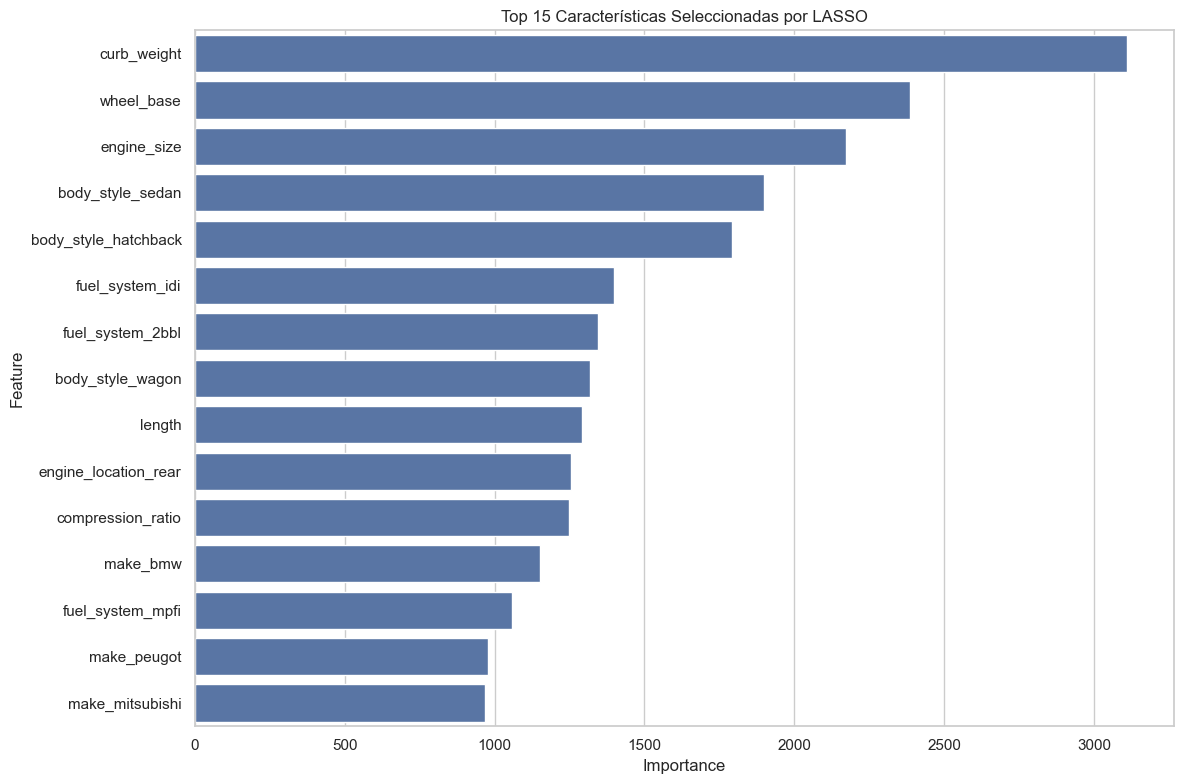

In [23]:
# Aplicar Lasso para selección de características
lasso = Lasso(alpha=0.1)  # Ajustar alpha según sea necesario
lasso.fit(X_train_no_corr, y_train)

# Mostrar los coeficientes
coefs = pd.Series(lasso.coef_, index=X_train_no_corr.columns)
importance = pd.DataFrame({'Feature': X_train_no_corr.columns, 'Importance': np.abs(lasso.coef_)})
importance = importance.sort_values('Importance', ascending=False)

# Visualizar las 15 características más importantes según LASSO
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance.head(15))
plt.title('Top 15 Características Seleccionadas por LASSO')
plt.tight_layout()
plt.show()

In [25]:
# Seleccionar características con coeficientes no nulos
lasso_selector = SelectFromModel(lasso, prefit=True)
X_train_lasso = lasso_selector.transform(X_train_no_corr)
X_test_lasso = lasso_selector.transform(X_test_scaled[X_train_no_corr.columns])

# Obtener nombres de características seleccionadas
selected_features_lasso = X_train_no_corr.columns[lasso_selector.get_support()]

print(f"Número de características seleccionadas por LASSO: {len(selected_features_lasso)}")
print("Características seleccionadas:")
print(selected_features_lasso.tolist())

Número de características seleccionadas por LASSO: 48
Características seleccionadas:
['symboling', 'num_of_doors', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'num_of_cylinders', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'make_audi', 'make_bmw', 'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu', 'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth', 'make_porsche', 'make_saab', 'make_subaru', 'make_toyota', 'make_volkswagen', 'make_volvo', 'aspiration_turbo', 'body_style_hardtop', 'body_style_hatchback', 'body_style_sedan', 'body_style_wagon', 'drive_wheels_fwd', 'engine_location_rear', 'engine_type_ohc', 'engine_type_ohcv', 'fuel_system_2bbl', 'fuel_system_idi', 'fuel_system_mfi', 'fuel_system_mpfi', 'fuel_system_spdi']


In [27]:
# Evaluar el modelo con las características seleccionadas por LASSO
lm.fit(X_train_lasso, y_train)
y_pred_lasso = lm.predict(X_test_lasso)

rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"RMSE con características LASSO: {rmse_lasso:.2f}")
print(f"R² con características LASSO: {r2_lasso:.4f}")

RMSE con características LASSO: 2809.14
R² con características LASSO: 0.9044


In [28]:
# Seleccionar características con coeficientes no nulos
lasso_selector = SelectFromModel(lasso, prefit=True)
X_train_lasso = lasso_selector.transform(X_train_no_corr)
X_test_lasso = lasso_selector.transform(X_test_scaled[X_train_no_corr.columns])

# Obtener nombres de características seleccionadas
selected_features_lasso = X_train_no_corr.columns[lasso_selector.get_support()]

print(f"Número de características seleccionadas por LASSO: {len(selected_features_lasso)}")
print("Características seleccionadas:")
print(selected_features_lasso.tolist())

Número de características seleccionadas por LASSO: 48
Características seleccionadas:
['symboling', 'num_of_doors', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'num_of_cylinders', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'make_audi', 'make_bmw', 'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu', 'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth', 'make_porsche', 'make_saab', 'make_subaru', 'make_toyota', 'make_volkswagen', 'make_volvo', 'aspiration_turbo', 'body_style_hardtop', 'body_style_hatchback', 'body_style_sedan', 'body_style_wagon', 'drive_wheels_fwd', 'engine_location_rear', 'engine_type_ohc', 'engine_type_ohcv', 'fuel_system_2bbl', 'fuel_system_idi', 'fuel_system_mfi', 'fuel_system_mpfi', 'fuel_system_spdi']


In [29]:
# Probar con diferentes valores de alpha para LASSO
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
rmse_scores = []
r2_scores = []
num_features = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_no_corr, y_train)
    
    # Contar características no nulas
    n_features = sum(lasso.coef_ != 0)
    num_features.append(n_features)
    
    # Evaluar en el conjunto de prueba
    y_pred = lasso.predict(X_test_scaled[X_train_no_corr.columns])
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    rmse_scores.append(rmse)
    r2_scores.append(r2)
    
    print(f"Alpha: {alpha}, # Features: {n_features}, RMSE: {rmse:.2f}, R²: {r2:.4f}")

Alpha: 0.0001, # Features: 49, RMSE: 2809.13, R²: 0.9044
Alpha: 0.001, # Features: 49, RMSE: 2809.12, R²: 0.9044
Alpha: 0.01, # Features: 49, RMSE: 2809.03, R²: 0.9044
Alpha: 0.1, # Features: 48, RMSE: 2808.14, R²: 0.9044
Alpha: 1, # Features: 47, RMSE: 2801.42, R²: 0.9049
Alpha: 10, # Features: 46, RMSE: 2802.36, R²: 0.9048
Alpha: 100, # Features: 28, RMSE: 2956.61, R²: 0.8941


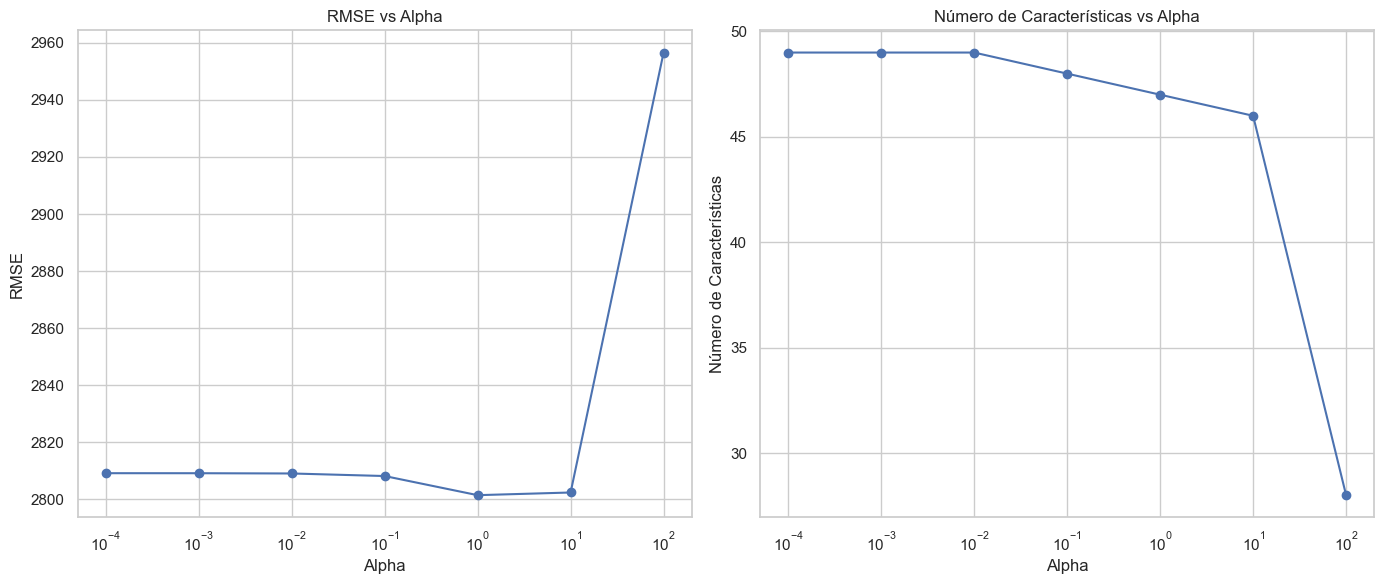

In [30]:
# Visualizar el efecto de alpha en LASSO
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.semilogx(alphas, rmse_scores, marker='o')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('RMSE vs Alpha')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.semilogx(alphas, num_features, marker='o')
plt.xlabel('Alpha')
plt.ylabel('Número de Características')
plt.title('Número de Características vs Alpha')
plt.grid(True)

plt.tight_layout()
plt.show()

## 6. Comparación de Modelos y Conclusión

In [31]:
# Comparar todos los métodos de selección de características
models = {
    'RFE (10 feat.)': {'features': selected_features_rfe, 'rmse': rmse_rfe, 'r2': r2_rfe},
    'RFECV': {'features': selected_features_rfecv, 'rmse': rmse_rfecv, 'r2': r2_rfecv},
    'LASSO': {'features': selected_features_lasso.tolist(), 'rmse': rmse_lasso, 'r2': r2_lasso}
}

# Entrenar modelo con todas las características disponibles (después de eliminar correlacionadas)
lm.fit(X_train_no_corr, y_train)
y_pred_all = lm.predict(X_test_scaled[X_train_no_corr.columns])
rmse_all = np.sqrt(mean_squared_error(y_test, y_pred_all))
r2_all = r2_score(y_test, y_pred_all)

models['Todas las características'] = {
    'features': X_train_no_corr.columns.tolist(), 
    'rmse': rmse_all, 
    'r2': r2_all
}

# Crear un DataFrame para comparar resultados
comparison = pd.DataFrame({
    'Método': list(models.keys()),
    'Número de Características': [len(model['features']) for model in models.values()],
    'RMSE': [model['rmse'] for model in models.values()],
    'R²': [model['r2'] for model in models.values()]
})

comparison.sort_values('RMSE')

,Método,Número de Características,RMSE,R²
3,Todas las características,49,2809.135900,0.904374
2,LASSO,48,2809.135900,0.904374
0,RFE (10 feat.),10,3052.268566,0.887105
1,RFECV,20,3198.309494,0.876043


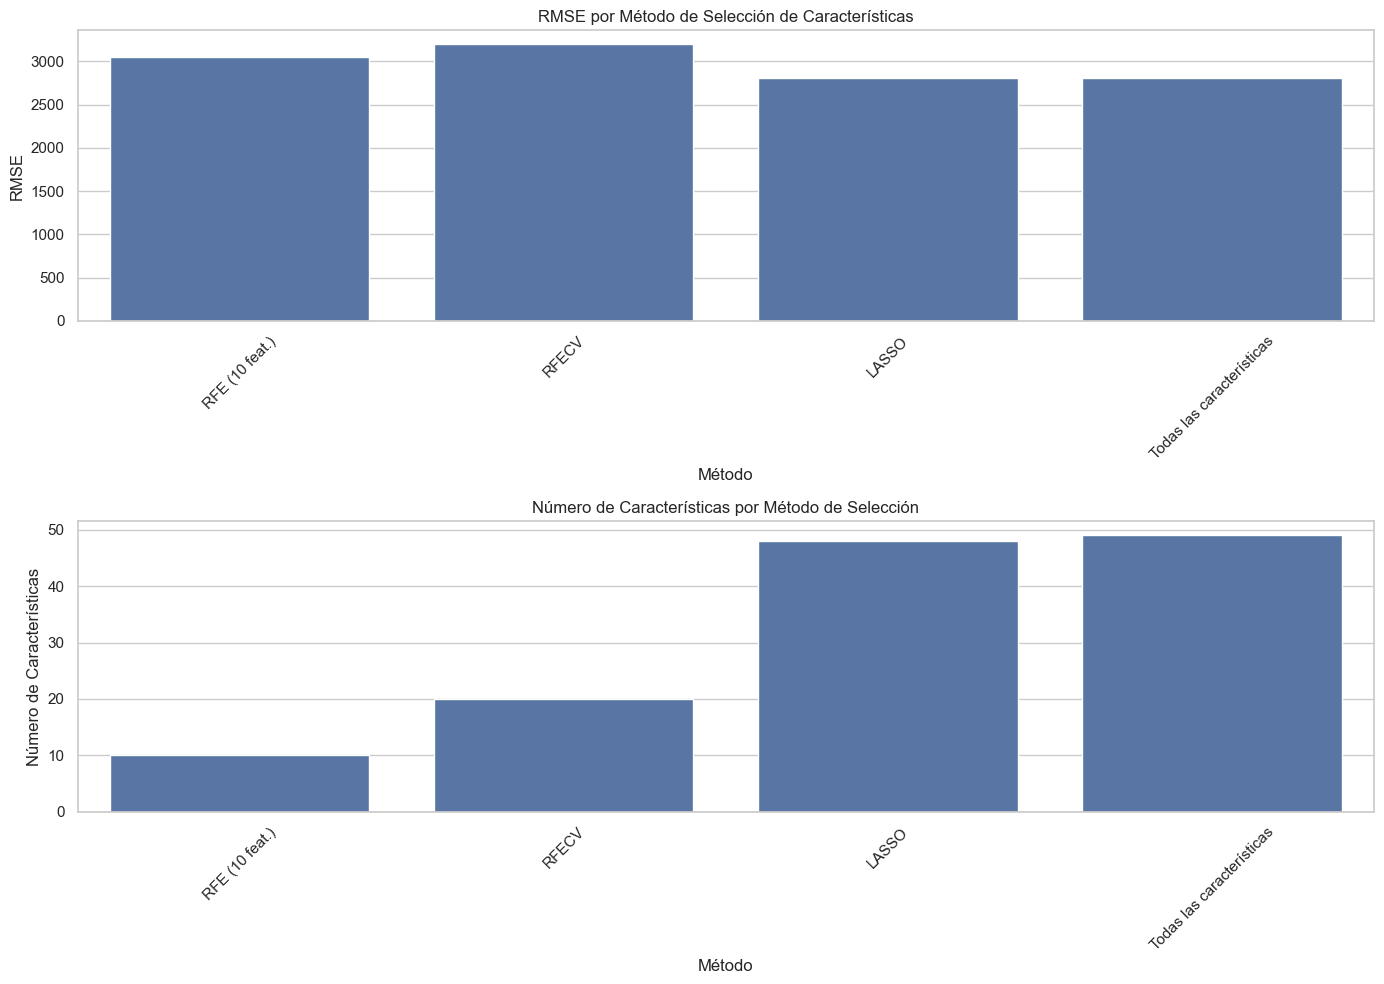

In [32]:
# Visualizar la comparación
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
sns.barplot(x='Método', y='RMSE', data=comparison)
plt.title('RMSE por Método de Selección de Características')
plt.xticks(rotation=45)
plt.grid(True, axis='y')

plt.subplot(2, 1, 2)
sns.barplot(x='Método', y='Número de Características', data=comparison)
plt.title('Número de Características por Método de Selección')
plt.xticks(rotation=45)
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

## 7. Características Finales Seleccionadas

Basado en los resultados anteriores, seleccionamos el conjunto de características del método que dio el mejor balance entre rendimiento (RMSE/R²) y simplicidad (número de características).

In [33]:
# Determinar el mejor método (en este caso asumimos que es RFECV)
best_method = 'LASSO'
best_features = models[best_method]['features']

print(f"Método seleccionado: {best_method}")
print(f"Número de características: {len(best_features)}")
print(f"RMSE: {models[best_method]['rmse']:.2f}")
print(f"R²: {models[best_method]['r2']:.4f}")
print("\nCaracterísticas seleccionadas:")
for feature in best_features:
    print(f"- {feature}")

Método seleccionado: LASSO
Número de características: 48
RMSE: 2809.14
R²: 0.9044

Características seleccionadas:
- symboling
- num_of_doors
- wheel_base
- length
- width
- height
- curb_weight
- num_of_cylinders
- engine_size
- bore
- stroke
- compression_ratio
- horsepower
- peak_rpm
- city_mpg
- make_audi
- make_bmw
- make_chevrolet
- make_dodge
- make_honda
- make_isuzu
- make_jaguar
- make_mazda
- make_mercedes-benz
- make_mitsubishi
- make_nissan
- make_peugot
- make_plymouth
- make_porsche
- make_saab
- make_subaru
- make_toyota
- make_volkswagen
- make_volvo
- aspiration_turbo
- body_style_hardtop
- body_style_hatchback
- body_style_sedan
- body_style_wagon
- drive_wheels_fwd
- engine_location_rear
- engine_type_ohc
- engine_type_ohcv
- fuel_system_2bbl
- fuel_system_idi
- fuel_system_mfi
- fuel_system_mpfi
- fuel_system_spdi


In [34]:
# Guardar la lista de características seleccionadas
selected_features_df = pd.DataFrame({'feature': best_features})

selected_features_df.to_csv('selected_features.csv', index=False)

# Guardar también el dataset con solo las características seleccionadas
final_df = autos_df.copy()
final_df = pd.get_dummies(final_df, columns=cat_cols, drop_first=True)
final_df = final_df[list(best_features) + ['price']]
final_df.to_csv('autos_selected_features.csv', index=False)